### As we have collected data previously , Now we will Analyse that data and find some insights

In [1]:
# First of all , we will import some libraries
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##### Importing Dataset & EDA

In [2]:
#First of all we will import our dataset in a dataframe
data = pd.read_csv('KrishNaik.csv')

In [3]:
data.head()

,Title,Published_date,Views,Likes
0,Announcing 7 Days Live Sessions On Machine Lea...,2022-01-31,10910,953
1,Earth In 2050,2022-01-30,9785,290
2,How To Calculate P Value In Hypothesis Testing,2022-01-30,3451,155
3,Live Day 7- Summarizing Statistics With Python...,2022-01-29,9142,614
4,Tutorial 9- MYSQL Stored Procedures -MySQL Com...,2022-01-29,2846,105


In [4]:
print('Number of rows = ',data.shape[0],'\nNumber of columns = ',data.shape[1],'\nSize of the dataset = ',data.size,' elements.')

Number of rows =  1315 
Number of columns =  4 
Size of the dataset =  5260  elements.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           1315 non-null   object
 1   Published_date  1315 non-null   object
 2   Views           1315 non-null   int64 
 3   Likes           1315 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 41.2+ KB


In [6]:
data.describe()

,Views,Likes
count,1.315000e+03,1315.000000
mean,3.533293e+04,931.196958
std,8.739598e+04,2192.562449
min,9.350000e+02,11.000000
25%,7.166000e+03,234.000000
50%,1.426100e+04,451.000000
75%,3.313250e+04,992.000000
max,1.989894e+06,49165.000000


### Making published date and time more readable

In [8]:
# Importing datetime library which provides great functions to handle date and time information
import datetime
i=0
for i in range(data.shape[0]):
    date_time_obj = datetime.datetime.strptime(data['Published_date'].at[i], '%Y-%m-%d')
    data['Published_date'].at[i] = date_time_obj
    i = i+1

In [9]:
i=0
date=[]
year=[]
month=[]
day=[]
for i in range(data.shape[0]):
    d = data['Published_date'][i].date();
    y = data['Published_date'][i].date().year;
    m = data['Published_date'][i].date().month;
    da = data['Published_date'][i].date().day;
    date.append(d) # Storing dates
    year.append(y) # Storing years
    month.append(m) # Storing months
    day.append(da) # Storing days
    i = i+1
data.drop(['Published_date'], inplace=True,axis=1)
data['Published_date']=date
data['year']=year
data['month'] = month
data['day'] = day

In [10]:
data

,Title,Views,Likes,Published_date,year,month,day
0,Announcing 7 Days Live Sessions On Machine Lea...,10910,953,2022-01-31,2022,1,31
1,Earth In 2050,9785,290,2022-01-30,2022,1,30
2,How To Calculate P Value In Hypothesis Testing,3451,155,2022-01-30,2022,1,30
3,Live Day 7- Summarizing Statistics With Python...,9142,614,2022-01-29,2022,1,29
4,Tutorial 9- MYSQL Stored Procedures -MySQL Com...,2846,105,2022-01-29,2022,1,29
...,...,...,...,...,...,...,...
1310,Important libraries used in python Data Scienc...,16567,143,2017-11-26,2017,11,26
1311,Anaconda installation with Packages- Machine L...,69721,312,2017-11-26,2017,11,26
1312,What is Supervised Machine Learning- Machine L...,27027,312,2017-11-26,2017,11,26
1313,What is Machine Learning in Data Science- Mach...,104754,633,2017-11-25,2017,11,25


### Exploratory Analysis and Visualization

In this section,will see different relationships among channel statistics parameters ( views, likes, comments, dislikes etc). 

##### Total views, likes, and comments of all videos

In [12]:
data[['Views','Likes']].sum()

Views    46462800
Likes     1224524
dtype: int64

##### Average no. of views, likes, comments on each video 

In [14]:
AvgLikes = data.describe()['Likes']['mean']
AvgViews = data.describe()['Views']['mean']
print('Average number of views on video = ',AvgViews,'\nAverage number of likes on video = ',AvgLikes)

Average number of views on video =  35332.92775665399 
Average number of likes on video =  931.1969581749049


## Monthwise Statistics

#### Monthwise uploaded videos

In [17]:
videos_per_month = data.groupby('month', as_index=False).size()
videos_per_month

,month,size
0,1,161
1,2,91
2,3,108
3,4,114
4,5,105
5,6,124
6,7,111
7,8,124
8,9,105
9,10,96


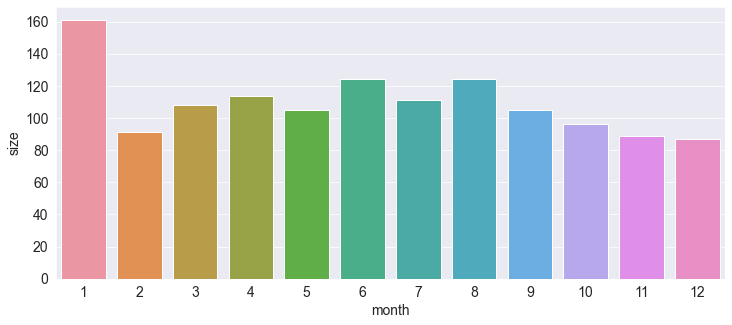

In [18]:
ax2 = sns.barplot(x='month', y='size', data=videos_per_month)

**Insights**:<br>1. Krish Naik Sir uploads highest number of videos in month of 'Jan' which is more than videos being uploaded in other months.<br>2. Krish Naik Sir uploads lowest number of videos in month of 'December'.

#### Monthwise total views and likes 

In [20]:
data.groupby(data['month']).sum()

,Views,Likes,year,day
month,,,,
1,5821048,136440,325342,2633
2,2253019,57214,183839,1264
3,2324325,58217,218189,1899
4,2266222,67392,230329,1516
5,2854741,82217,212149,1666
6,2949833,77346,250506,1923
7,4041828,117775,224236,1770
8,7303600,233470,250476,2039
9,6140186,129935,212080,1419


#### Monthwise statistics using scatterplots

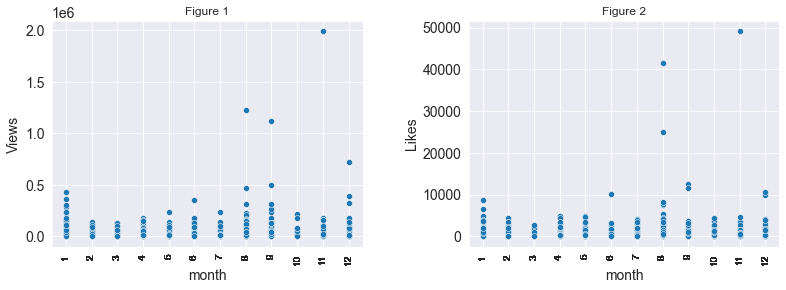

In [21]:
# Importing sys module which provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter.
import sys

if not sys.warnoptions:
    # Importing warnings library to handle warnings
    import warnings
    warnings.simplefilter("ignore")
    
fig, (ax1, ax2) = plt.subplots(1, 2)

# Monthwise statistics of views
sns.scatterplot(data['month'],data['Views'],ax=ax1)
ax1.set_title('Figure 1',fontsize=12)
ax1.set_xticks(data['month'])
ax1.set_xticklabels(data['month'],rotation=90,fontsize=10)

# Monthwise statistics of likes
sns.scatterplot(data['month'],data['Likes'],ax=ax2)
ax2.set_title('Figure 2',fontsize=12)
ax2.set_xticks(data['month'])
ax2.set_xticklabels(data['month'],rotation=90,fontsize=10)

plt.tight_layout(pad=3)

**Insights**: <br>1. Krish Naik Sir uploaded his most viewed video in month of 'November'.<br>2. Krish Naik uploaded his most liked video in month of 'November'.

### Yearwise Statistics

#### Yearwise uploaded videos

In [22]:
data.groupby('year')['year'].count()

year
2014      1
2017      4
2018      8
2019    276
2020    516
2021    467
2022     43
Name: year, dtype: int64

**Insights**: Krish Naik Sir uploaded highest number of videos in year 2020.

#### Yearwise total views and likes

In [24]:
data.groupby(data['year']).sum()

,Views,Likes,month,day
year,,,,
2014,4364,117,6,1
2017,218069,1400,44,103
2018,390394,5799,47,139
2019,19042477,488690,2194,4322
2020,16011614,421072,3123,8233
2021,8914887,274214,2632,6913
2022,1880995,33232,43,781


#### Yearwise statistics using scatterplots

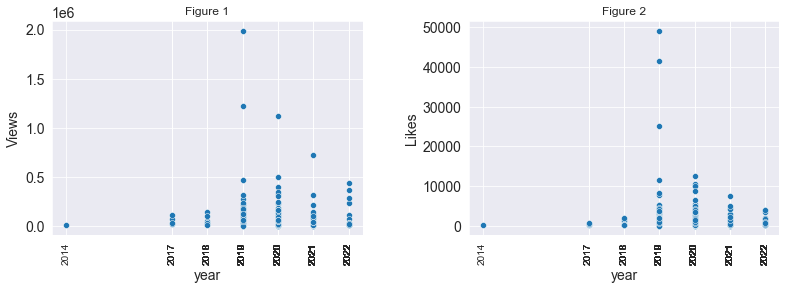

In [25]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
fig, (ax1, ax2) = plt.subplots(1, 2)

# Yearwise statistics of views
sns.scatterplot(data['year'],data['Views'],ax=ax1)
ax1.set_title('Figure 1',fontsize=12)
ax1.set_xticks(data['year'])
ax1.set_xticklabels(data['year'],rotation=90,fontsize=10)

# Yearwise statistics of likes
sns.scatterplot(data['year'],data['Likes'],ax=ax2)
ax2.set_title('Figure 2',fontsize=12)
ax2.set_xticks(data['year'])
ax2.set_xticklabels(data['year'],rotation=90,fontsize=10)

plt.tight_layout(pad=3)

**Insights**: <br>1. Krish Naik Sir uploaded its most viewed video in the year '2019'.<br>2. Krish Naik Sir uploaded its most liked video in the year '2019'.

#### Top 10 most viewed & Liked videos from the dataset

In [26]:
top_viewed_video = data.sort_values(by='Views',ascending=False).head(10)
top_viewed_video

,Title,Views,Likes,Published_date,year,month,day
1062,AI VS ML VS DL VS Data Science,1989894,49165,2019-11-26,2019,11,26
1180,How To Learn Data Science Smartly?,1224517,41469,2019-08-22,2019,8,22
622,Complete Road Map To Be Expert In Python- Foll...,1115038,12435,2020-09-18,2020,9,18
58,OTT Platform For Education OneNeuron- Educatio...,722171,859,2021-12-11,2021,12,11
612,Complete Road Map To Prepare NLP-Follow This V...,497752,3292,2020-09-25,2020,9,25
1171,How To Learn Data Science by Self Study and Fo...,467996,25044,2019-08-27,2019,8,27
34,Complete Roadmap For Becoming A Blockchain Dev...,433321,1753,2022-01-11,2022,1,11
512,Negotiating Salaries With HR for Any Job Is An...,395843,10616,2020-12-30,2020,12,30
41,Learning Data Science In 2022- Step By Step Plan,365625,4012,2022-01-04,2022,1,4
727,Live- Implementation of End To End Kaggle Mach...,348238,10049,2020-06-30,2020,6,30


In [27]:
data.sort_values(by='Likes',ascending=False).head(10)

,Title,Views,Likes,Published_date,year,month,day
1062,AI VS ML VS DL VS Data Science,1989894,49165,2019-11-26,2019,11,26
1180,How To Learn Data Science Smartly?,1224517,41469,2019-08-22,2019,8,22
1171,How To Learn Data Science by Self Study and Fo...,467996,25044,2019-08-27,2019,8,27
622,Complete Road Map To Be Expert In Python- Foll...,1115038,12435,2020-09-18,2020,9,18
1138,How Did I Learn Machine Learning in 3 Months,318134,11507,2019-09-18,2019,9,18
512,Negotiating Salaries With HR for Any Job Is An...,395843,10616,2020-12-30,2020,12,30
727,Live- Implementation of End To End Kaggle Mach...,348238,10049,2020-06-30,2020,6,30
511,6 Certifications In Data Science But No Jobs- ...,321358,9998,2020-12-31,2020,12,31
997,Step By Step Action Plan For Learning Data Sci...,239733,8688,2020-01-26,2020,1,26
1177,Tutorial 43-Random Forest Classifier and Regre...,206697,8119,2019-08-24,2019,8,24


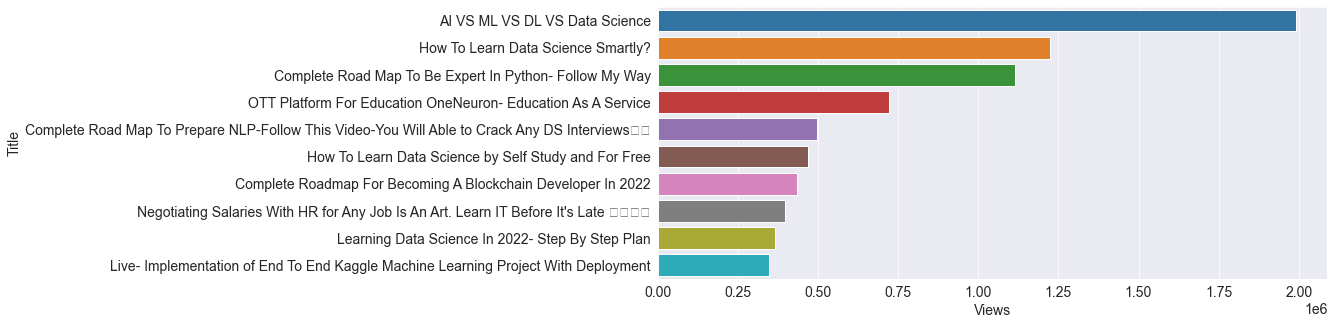

In [28]:
ax1 = sns.barplot(x='Views', y='Title', data=top_viewed_video)

## Asking and Answering Questions

We've seen many relationships above. Now, we'll see some interesting questions from the above insights of plots and about the channel according to our dataset.

#### Q1. Has this Corona pandemic affected this channel till now?

According to the yearwise statistics, Krish Naik Sir has uploaded 516 in 2020 and 467 videos till now in year 2021 which is higher than the total number of videos uploaded in year 2019. Also, channel is doing good in terms of views, likes and comments in this year so they are able to manage the channel in this pandemic with their video content.

#### Q2:  What is the title of most famous video of this channel?

In [29]:
pd.options.display.max_colwidth = 50
data.sort_values(by='Views',ascending=False).head(1)

,Title,Views,Likes,Published_date,year,month,day
1062,AI VS ML VS DL VS Data Science,1989894,49165,2019-11-26,2019,11,26


In [30]:
pd.options.display.max_colwidth = 100
print(data.sort_values(by='Views',ascending=False).head(1)['Title'])

1062    AI VS ML VS DL VS Data Science
Name: Title, dtype: object


#### Q3: Which are the recent videos uploaded on this channel?

In [31]:
# Latest 10 videos from the dataset
pd.options.display.max_colwidth = 50
data.sort_values(by='Published_date',ascending=False).head(10)

,Title,Views,Likes,Published_date,year,month,day
0,Announcing 7 Days Live Sessions On Machine Lea...,10910,953,2022-01-31,2022,1,31
2,How To Calculate P Value In Hypothesis Testing,3451,155,2022-01-30,2022,1,30
1,Earth In 2050,9785,290,2022-01-30,2022,1,30
3,Live Day 7- Summarizing Statistics With Python...,9142,614,2022-01-29,2022,1,29
4,Tutorial 9- MYSQL Stored Procedures -MySQL Com...,2846,105,2022-01-29,2022,1,29
5,Live Day 6- Advance Statistics With Python In ...,11451,752,2022-01-28,2022,1,28
6,Live Day 5- Advance Statistics With Python In ...,14014,860,2022-01-27,2022,1,27
7,Tutorial 8- Discussing All Types Of Joins -MyS...,4335,196,2022-01-27,2022,1,27
8,Live Day 4- Advance Statistics With Python In ...,19427,1197,2022-01-26,2022,1,26
9,Vision Of OneNeuron Platform- How We Are Solvi...,8091,309,2022-01-25,2022,1,25


## Inferences and Conclusion

In this project, we extracted Youtube channel Krish Naik' videos information using Youtube API, Python, GoogleApiClient and requests libraries. We prepared our csv dataset using it. We cleaned this raw dataset, performed some operations to make it more convenient to use and analyse. Then we analysed different relationships among  views, likes, comments, months, years etc. We asked and answered some questions based on this information.

### Created By :- Anmol Malviya, Pursuing M.Sc In Data Science And Analytics From School Of Data Science And Forecasting, DAVV,Indore(M.P)
